In [12]:
import cv2
from camera import Camera
import matplotlib.pyplot as plt
import numpy as np


In [35]:
l_threshold = 11
a_threshold = 61
b_threshold = 99

canny_threshold1 = 34
canny_threshold2 = 214

img_path = "C:/Users/lisas/Documents/EPFL/MA2/MICRO-452_mobile_robotics/test.jpg"

In [29]:
def show_img(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

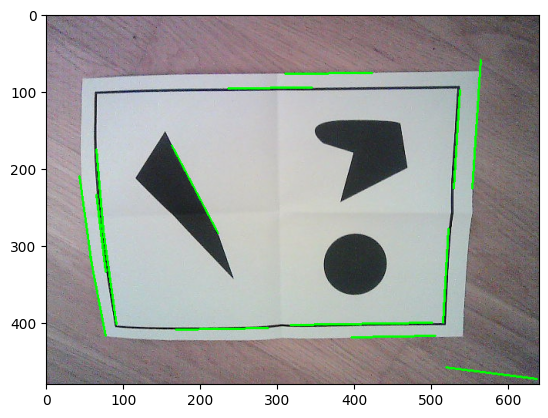

In [ ]:
def hough_lines(image):
    # Load image, grayscale, Canny edge detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    # Use HoughLinesP to detect lines
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 90, minLineLength=90, maxLineGap=10)
    # Draw lines on the image
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    # Display the image
    show_img(image)

img = cv2.imread(img_path)
hough_lines(img)

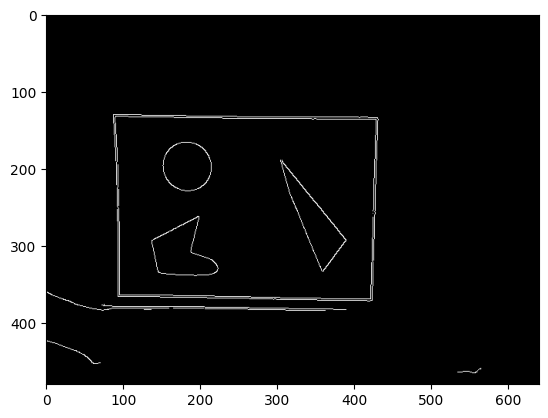

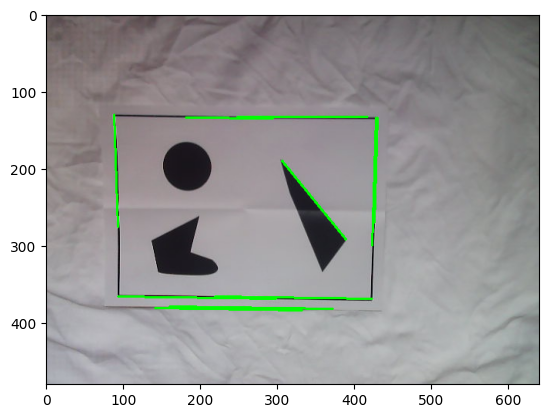

In [ ]:
def detect_rectangles(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    # edges = cv2.GaussianBlur(gray, (3,3), 0)

    # Debug: Show the result of edge detection
    # cv2.imshow("Edges", edges)
    show_img(edges)

    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 80, minLineLength=90, maxLineGap=20)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # cv2.imshow("Rectangles Detected", image)
    show_img(image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()


detect_rectangles(img_path)


In [ ]:
img = cv2.imread(img_path)



In [ ]:
# x = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img = cv2.inRange(img, (l_threshold, a_threshold, b_threshold), (255, 255, 255))
show_img(img)
x = img.copy()

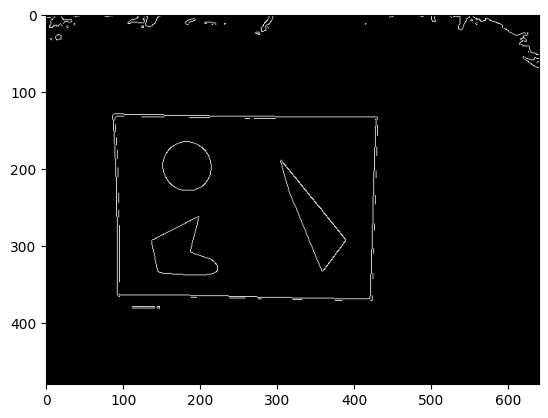

In [9]:
x = cv2.Canny(x, canny_threshold1, canny_threshold2)

show_img(x)

# transform of map

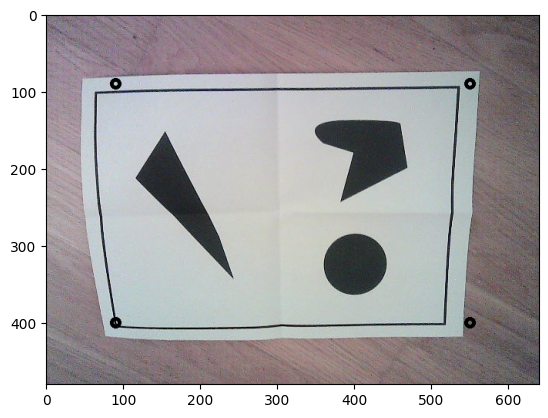

In [63]:
img = cv2.imread(img_path)

corners = [[90,90], [90,400], [550,400], [550,90]]

for c in corners:
    cv2.circle(img, c, 5, (0,0,0), 3)

show_img(img)

In [65]:
def draw_grid(img, grid_shape, corners, color=(0, 0, 0), thickness=1):
    h = abs(corners[0][1]-corners[1][1])
    w = abs(corners[0][0]-corners[3][0])
    startx, starty = corners[0][0], corners[0][1]
    rows, cols = grid_shape
    dy, dx = h / rows, w / cols

    # draw vertical lines
    for x in np.linspace(start=startx, stop=startx+w, num=cols+1):
        x = int(round(x))
        cv2.line(img, (x, starty), (x, starty+h), color=color, thickness=thickness)

    # draw horizontal lines
    for y in np.linspace(start=starty, stop=starty+h, num=rows+1):
        y = int(round(y))
        cv2.line(img, (startx, y), (startx+w, y), color=color, thickness=thickness)

    return img

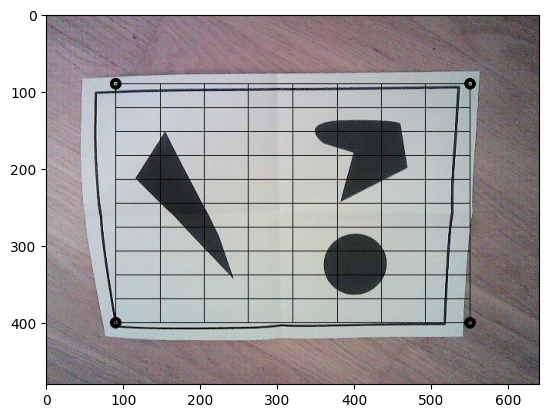

In [66]:
# add grid
img = draw_grid(img, (10,8), corners)
show_img(img)